In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.stats import norm
import matplotlib.mlab as mlab

f = open("calibration_3.txt","r")
energy = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

part_abs = 1.
part_sd = 1.

# read data
data = []
data_ = []
for line in f:
    if line == '\n':
        data.append(data_)
        data_ = []
    else:
        data_.append(float(line[:-2]))

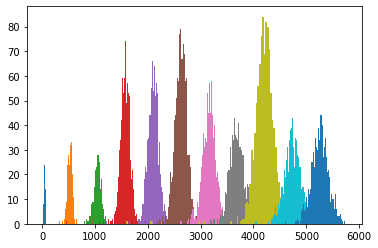

In [2]:
for data_ in data:
    plt.hist(data_, bins=100);
# n, bins, patches = plt.hist(data[5], bins=100);
# print(n)
# print(bins)
# print(patches)

In [3]:
energy_mean= [np.mean(data_) for data_ in data]
energy_std = [np.std(data_) for data_ in data]

a = 0.5263885191866657 +- 0.00023402153409646852
b = -5.409516082602842 +- 0.4183292636694414


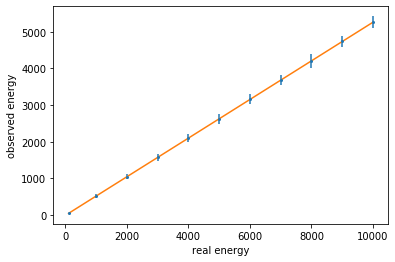

In [4]:
# fit
popt, pcov = spopt.curve_fit(lambda x, a, b: a*x+b, energy, energy_mean, sigma = energy_std)
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
plt.errorbar(energy, energy_mean, fmt='o', markersize=2, yerr=energy_std)
plt.xlabel('real energy')
plt.ylabel('observed energy')
x = np.linspace(energy[0], energy[-1], 500)
plt.plot(x, a*x+b)
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")

In [5]:
def get_real_energy(E_observed):
    return(E_observed - b) / a

In [6]:
f = open("reduction_3.txt","r")
energy_real = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]


data_reduction = []
data_reduction_ = []
for line in f:
    if line == '\n':
        data_reduction.append(data_reduction_)
        data_reduction_ = []
    else:
        data_reduction_.append(float(line[:-2]))


In [7]:
data_real = [get_real_energy(np.array(data_reduction_)) for data_reduction_ in data_reduction]

# def curve(x, mu, sigma, nevents):
#     return nevents / (np.sqrt(2 * np.pi * sigma**2) * x) * np.exp( - (np.log(x) - mu)**2 / (2 * sigma**2))
def curve(x, mu, sigma, nevents):
    return nevents / (np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

sigmas = {}
delta_sigmas = {}

In [8]:
def proc(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy_real[number]
    n, bins, patches = plt.hist(data_real[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    sigmas[en] = sigma
    delta_sigmas[en] = delta_sigma
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))
    
    print(f"mean = {np.mean(data_real[number])}\nstd = {np.std(data_real[number])}\n\n")


mu = 503.1584504336973 +- 2.256088314573533
sigma = 62.91030845740325 +- 1.7738968625745806
nevents = 8767.811635473548 +- 306.6591703920303
mean = 500.09843018489465
std = 65.94611152768336




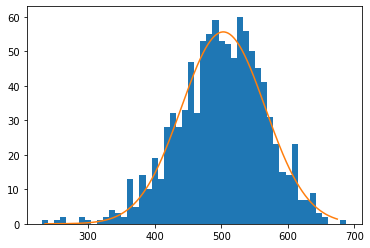

In [9]:
proc(0, 50, [500, 150, 10000])

mu = 1507.5010772213434 +- 3.9607084103093633
sigma = 110.35148659520031 +- 3.111635387890766
nevents = 25630.816066947074 +- 902.7514273590314
mean = 1504.7428465128035
std = 116.30176980190062




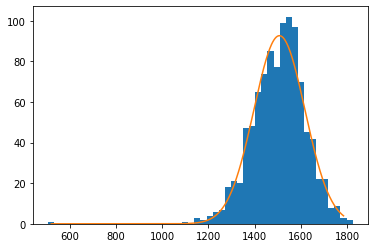

In [10]:
proc(1, 50, [1500, 200, 100000])

mu = 2504.0891046075617 +- 4.25824592074118
sigma = 144.4809968556815 +- 3.2476131585778454
nevents = 23476.306119141318 +- 679.2906440502985
mean = 2501.4365931405705
std = 147.0283319553334




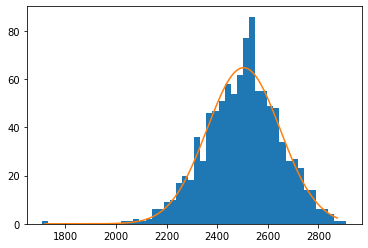

In [11]:
proc(2, 50, [2500, 300, 100000])

mu = 3499.691678118471 +- 5.005090849625016
sigma = 170.10720153231404 +- 3.974350279772426
nevents = 22874.775495777332 +- 663.3974031956932
mean = 3497.3370868101506
std = 174.31672757336523




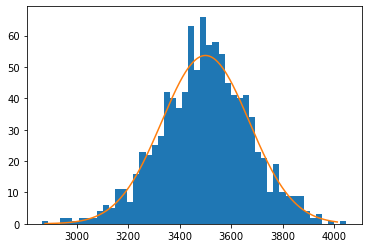

In [12]:
proc(3, 50, [3500, 400, 100000])

mu = 4508.0614960123685 +- 5.971909220949639
sigma = 190.67780529988232 +- 4.498466705687643
nevents = 38072.43086682148 +- 1178.5334752754873
mean = 4503.907549381558
std = 207.15090744888576




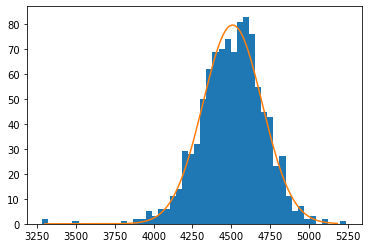

In [13]:
proc(4, 50, [4500, 500, 100000])

mu = 5497.036708172619 +- 7.738776213994419
sigma = 212.9171504583285 +- 5.9815702764204906
nevents = 54478.23978243993 +- 1915.5851192254534
mean = 5495.672830160547
std = 233.39731480302603




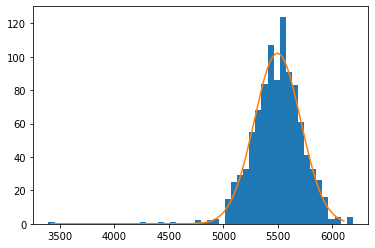

In [14]:
proc(5, 50, [5500, 500, 100000])

mu = 6496.140253842053 +- 7.9063369933589716
sigma = 228.05837797721912 +- 5.628270039613114
nevents = 59985.630247090194 +- 2056.659838046734
mean = 6489.457464613211
std = 249.06153312841496




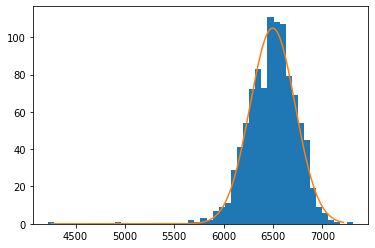

In [15]:
proc(6, 50, [6500, 500, 100000])

mu = 7480.767408291713 +- 9.10874000683617
sigma = 251.52349351038927 +- 6.919382886327518
nevents = 63765.04864130264 +- 2292.37178752911
mean = 7473.87508073193
std = 280.278615499893




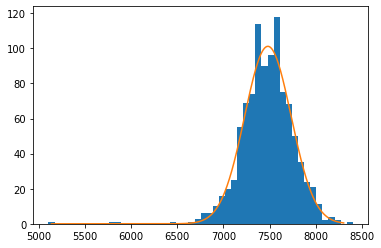

In [16]:
proc(7, 50, [7500, 600, 100000])

mu = 8492.384415503604 +- 8.778240503074818
sigma = 284.6003968199448 +- 6.799378890511919
nevents = 33223.22903581668 +- 1000.2678085929439
mean = 8489.888271077261
std = 285.416561252589




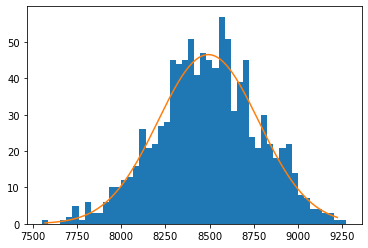

In [17]:
proc(8, 50, [8500, 500, 1000000])

mu = 9495.17244875546 +- 9.90158286634428
sigma = 286.6667925728546 +- 7.653779302316664
nevents = 50160.228007754995 +- 1679.245634896266
mean = 9485.233394009558
std = 296.37072754578907




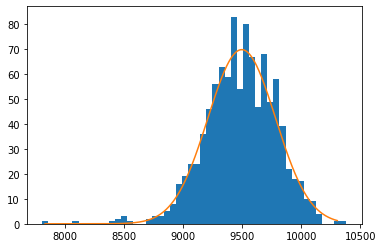

In [18]:
proc(9, 50, [9500, 700, 1000000])

In [19]:
delta_E_to_E = [sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))]

a = 0.0019692475808399668 +- 0.0009652987168751081
b = 2.758167299769743 +- 0.06772587971158114


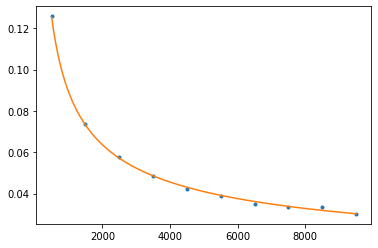

In [20]:
def curve_energy(x, a, b):
    return a + b / np.sqrt(x)

popt, pcov = spopt.curve_fit(curve_energy, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy(x, a, b))

In [21]:
file = open('results.txt', 'a+')
file.write(f"{part_abs} {part_sd} {a} {delta_a} {b} {delta_b}\n")
file.close()

a = 0.008305848473381509 +- 0.009229154297596881
b = 3.1035173883124068 +- 0.5049276277557054
c = -0.0955838850728145 +- 0.13839919504969944


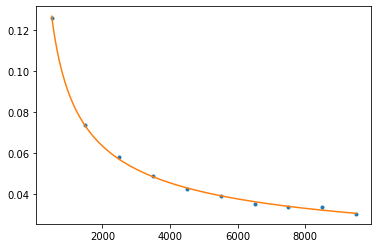

In [22]:
def curve_energy_modified(x, a, b, c):
    return a + b / np.sqrt(x) + c / np.sqrt(np.sqrt(x))

popt, pcov = spopt.curve_fit(curve_energy_modified, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b, c = popt
delta_a, delta_b, delta_c = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}\nc = {c} +- {delta_c}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy_modified(x, a, b, c))